Importing Needed Libraries

In [11]:
#Step 1: Import Libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Loading and Preprocessing Dataset

In [12]:
#Step 2: Load and Prepare the Dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
df = pd.concat([train_df, test_df], ignore_index=True)

#Keep only labeled rows
labeled_df = df.dropna(subset=["price_range"])
if "id" in labeled_df.columns:
    labeled_df = labeled_df.drop(columns=["id"])

X_raw = labeled_df.drop(columns=["price_range"]).values
y = labeled_df["price_range"].astype(int).values

#Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

Defining Support Vector Machine(SVM) Evalution Function

In [13]:

#Step 3: Define Evaluation Function
def evaluate_svm(X, y, C_values, sample_ratios):
    results = []

    for sample_ratio in sample_ratios:
        if sample_ratio < 1.0:
            X_part, _, y_part, _ = train_test_split(X, y, train_size=sample_ratio, stratify=y, random_state=42)
        else:
            X_part, y_part = X, y

        X_train, X_test, y_train, y_test = train_test_split(X_part, y_part, test_size=0.2, stratify=y_part, random_state=42)

        for C in C_values:
            model = LinearSVC(C=C, max_iter=50000)
            start_time = time.time()
            model.fit(X_train, y_train)
            train_time = time.time() - start_time

            y_pred = model.predict(X_test)
            acc_holdout = accuracy_score(y_test, y_pred)
            f1_holdout = cross_val_score(model, X_train, y_train, cv=5, scoring="f1_weighted").mean()
            f1_cv_full = cross_val_score(model, X_part, y_part, cv=5, scoring="f1_weighted").mean()

            results.append({
                "Sample Ratio": sample_ratio,
                "C": C,
                "Accuracy (Holdout)": acc_holdout,
                "F1 (Holdout CV)": f1_holdout,
                "F1 (Full CV)": f1_cv_full,
                "Training Time (s)": train_time
            })

    return pd.DataFrame(results)

Runing Evaluation

In [14]:
#Step 4: Run SVM Evaluations
C_values = [0.1, 1.0, 10.0]
sample_ratios = [1.0, 0.5, 0.25]

results_df = evaluate_svm(X_scaled, y, C_values, sample_ratios)

Plotting Results

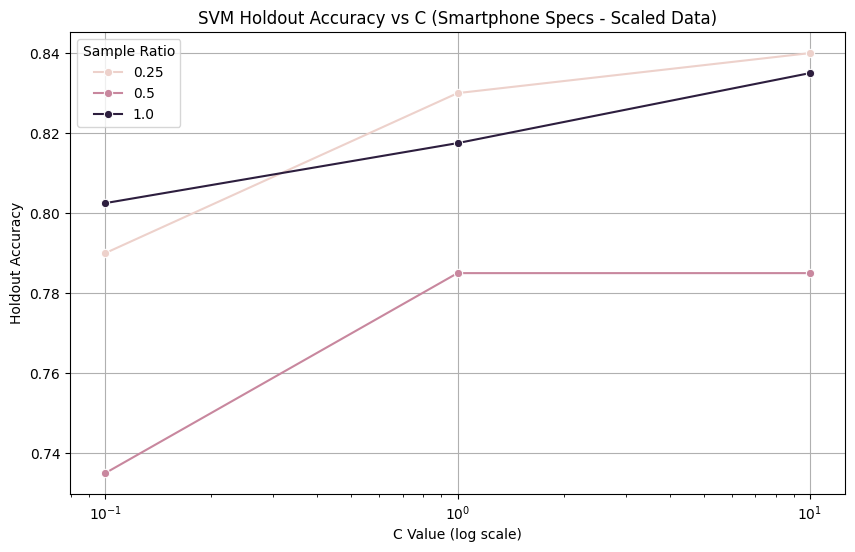

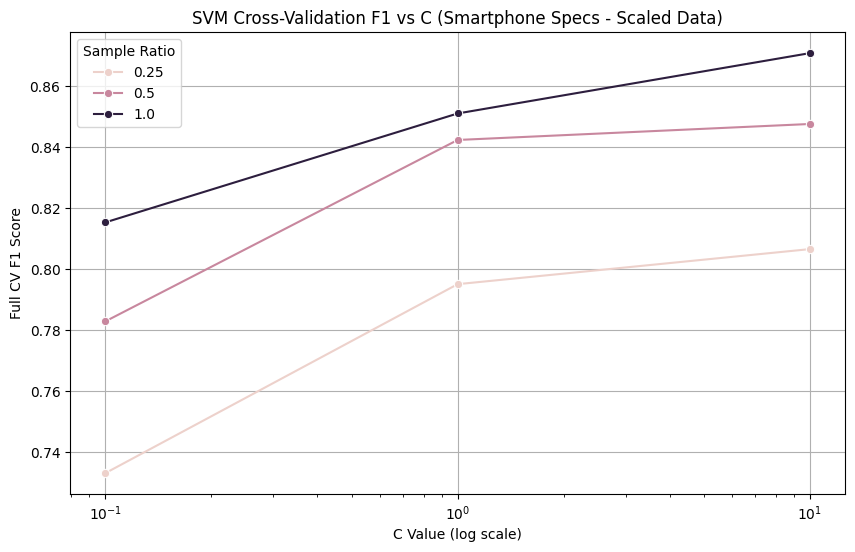

SVM Evaluation Complete for Smartphone Specs Dataset
   Sample Ratio     C  Accuracy (Holdout)  F1 (Holdout CV)  F1 (Full CV)  \
0          1.00   0.1              0.8025         0.798180      0.815313   
1          1.00   1.0              0.8175         0.837782      0.851001   
2          1.00  10.0              0.8350         0.854101      0.870777   
3          0.50   0.1              0.7350         0.765391      0.782885   
4          0.50   1.0              0.7850         0.834709      0.842318   
5          0.50  10.0              0.7850         0.849445      0.847558   
6          0.25   0.1              0.7900         0.702483      0.733149   
7          0.25   1.0              0.8300         0.737674      0.795067   
8          0.25  10.0              0.8400         0.771555      0.806556   

   Training Time (s)  
0           0.014469  
1           0.007033  
2           0.006780  
3           0.003486  
4           0.003966  
5           0.005448  
6           0.002346  
7 

In [15]:

#Step 5: Plot Results
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x="C", y="Accuracy (Holdout)", hue="Sample Ratio", marker="o")
plt.xscale('log')
plt.title("SVM Holdout Accuracy vs C (Smartphone Specs - Scaled Data)")
plt.xlabel("C Value (log scale)")
plt.ylabel("Holdout Accuracy")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x="C", y="F1 (Full CV)", hue="Sample Ratio", marker="o")
plt.xscale('log')
plt.title("SVM Cross-Validation F1 vs C (Smartphone Specs - Scaled Data)")
plt.xlabel("C Value (log scale)")
plt.ylabel("Full CV F1 Score")
plt.grid(True)
plt.show()

# Final output
print("SVM Evaluation Complete for Smartphone Specs Dataset")
print(results_df)
